In [70]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## For Clustering:

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn import preprocessing
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#### We are assuming that the problem as Unsupervised Learning problem, so the lables are unknown here:

In [71]:
dataset = pd.read_csv('energydata_complete.csv')
dataset.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,1/11/2016 17:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,1/11/2016 17:10,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,1/11/2016 17:20,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,1/11/2016 17:30,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
4,1/11/2016 17:40,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


#### We will check for the missing values:

In [72]:
dataset.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

#### As a part of the experiemnet - going forward we have to apply several dimensionality reduction techniques (Feature Selection, PCA, ICA and Random Projections), so for now I am only dropping the 'date' column, rest I will do going forward:

In [73]:
energy_data = dataset.drop(columns=['date','Appliances'], axis=1)

In [74]:
energy_data.head()

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
4,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


### 1. K-Means Clustering: 

Implementing the Elbow Method to find the optimum number of clusters based on WCSS i.e. Within Cluster Sum of Square

In [75]:
from sklearn.cluster import KMeans

wcss=[] #Withing Cluster Sum of Square

#As mentioned during the lecture max number of cluster would be 10 (but again it depends)
#k-means++: selects initial cluster centers for k-mean clustering in a smart way to speed up convergence

for i in range(1,15):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0, max_iter=300)
    kmeans.fit(energy_data)
    wcss.append(kmeans.inertia_)
    
#inertia_ is the formula used to segregate the data points into clusters

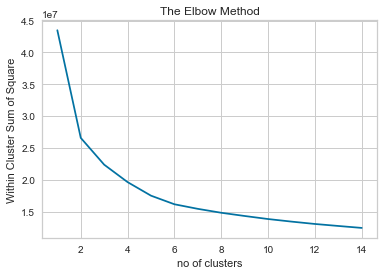

In [76]:
#Visualizing the ELBOW method to get the optimal value of K 

plt.plot(range(1,15), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('Within Cluster Sum of Square')
plt.show()

By observing the plot closelt the last that I am getting for my data is at 4 (So for this data K = 4)

In [77]:
## Run the model for k=4

kmeans = KMeans(n_clusters= 4, init='k-means++', random_state=0, max_iter=300)
kmeans.fit(energy_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [78]:
kmean_clus = kmeans.labels_
kmean_center = kmeans.cluster_centers_

print(kmean_clus)
print(kmean_center)

## Add the column of clusters i.e. 'kmean_clus' to the original Dataset:

dataset['kmean_clus'] = kmean_clus

[3 3 0 ... 1 1 1]
[[  5.35714286  20.6726243   41.40740687  19.38300434  41.40231668
   20.81809753  41.30876766  19.34757173  41.12766302  18.30565501
   53.87352795   4.33531717  86.92836599  18.46250214  37.63218728
   20.46781879  45.9517666   17.76712446  43.36536232   4.38756291
  755.17477351  88.71295739   4.50225349  40.3735766    2.59594512
   36.04671365  36.04671365]
 [  2.58031512  22.93503736  39.16709022  22.52984919  37.25657847
   23.73127553  37.51999242  22.6332443   37.28082064  20.92786546
   48.28417677  14.43944557  12.42350366  22.1389812   33.2946213
   23.41431394  39.78252408  21.1111229   39.66222089  12.87138326
  756.6738217   60.58205443   4.14634063  37.35816111   5.02647321
   22.0906494   22.0906494 ]
 [  2.88423548  22.052427    39.89886872  20.06446104  41.52650954
   23.00572126  38.19724988  21.44198608  38.06924606  20.20272283
   49.27959572   7.87155018  45.64747681  21.09547019  34.59904364
   22.88548971  41.87341207  20.3843605   40.93712909 

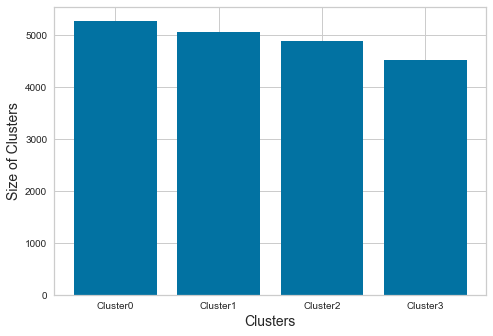

In [79]:
# Frequency distribution of k means clusters
dataset['kmean_clus'].value_counts()

# Cluster size plot for k means clusters
sizes=dataset['kmean_clus'].value_counts()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
clust = ['Cluster0', 'Cluster1', 'Cluster2', 'Cluster3']

plt.xlabel('Clusters', fontsize=14)
plt.ylabel('Size of Clusters', fontsize=14)

ax.bar(clust,sizes)
plt.show()

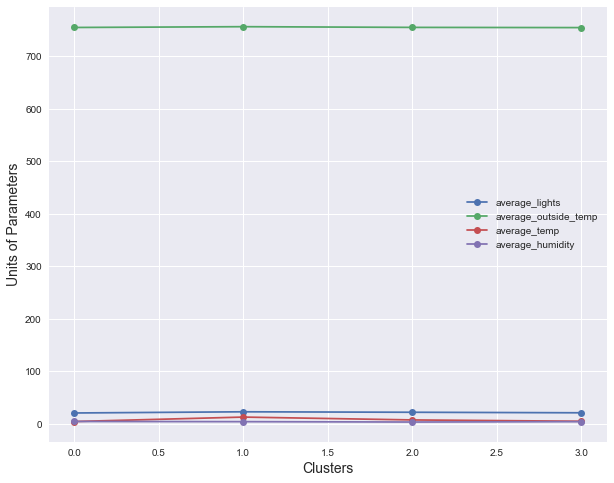

In [219]:
# Calculating Average value of relevant variables for k means (T1, RH-1)
average_lights = kmean_center[:,1]
average_outside_temp = kmean_center[:,20]
average_temp=kmean_center[:,19]
average_humidity=kmean_center[:,22]

x = np.arange(4)
x
sns.set(rc={'figure.figsize':(10,8)})
plt.plot(x, average_lights,marker='o')
plt.plot(x, average_outside_temp,marker='o')
plt.plot(x, average_temp,marker='o')
plt.plot(x, average_humidity,marker='o')

plt.xlabel('Clusters', fontsize=14)
plt.ylabel('Units of Parameters', fontsize=14)

plt.legend(['average_lights', 'average_outside_temp', 'average_temp', 'average_humidity'], loc='best')

plt.show()

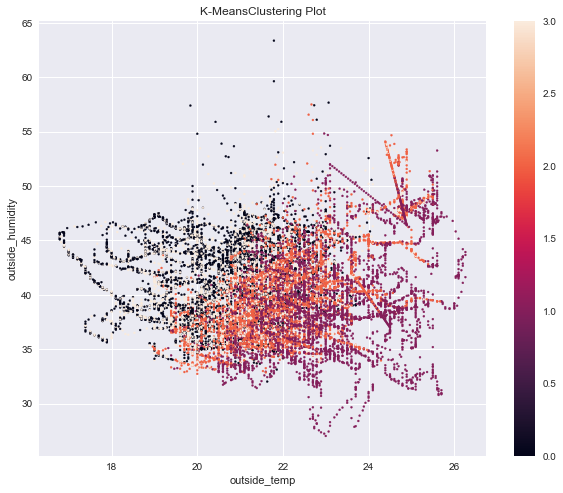

In [220]:
plot_set=pd.DataFrame()
plot_set['x']=dataset['T1']
plot_set['y']=dataset['RH_1']
plot_set['label']=dataset['kmean_clus']
x = plot_set['x']
y = plot_set['y']
cluster = plot_set['label']  # Labels of cluster

sns.set(rc={'figure.figsize':(10,8)})
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(x,y,c=cluster,s=4)
ax.set_title('K-MeansClustering Plot')
ax.set_xlabel('outside_temp')
ax.set_ylabel('outside_humidity')
plt.colorbar(scatter)

### 2. Expectation Maximization Clustering: 

Kind of similar to K-Means, but, instead of assigning examples to clusters to maximize the differences in means for continuous variables, the EM clustering algorithm computes probabilities of cluster memberships based on one or more probability distributions,

#### Here I am using Gaussian Mixture Model for EM Clustering-

In [82]:
gmm = GaussianMixture(n_components = 4).fit(energy_data)
em_clus = gmm.predict(energy_data)
gmm_centers=gmm.means_
## Add the column of clusters from GMM i.e. 'em_clus' to the original Dataset:

dataset['em_clus'] = em_clus

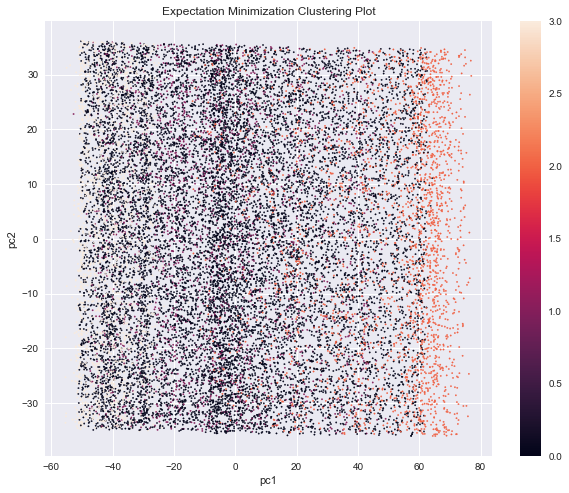

In [221]:
plot_set=pd.DataFrame()
plot_set['x']=principal_components[:,0]
plot_set['y']=principal_components[:,1]
plot_set['label']=dataset['em_clus']
x = plot_set['x']
y = plot_set['y']
cluster = plot_set['label']  # Labels of cluster from EM

sns.set(rc={'figure.figsize':(10,8)})

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(x,y,c=cluster,s=2)
ax.set_title('Expectation Minimization Clustering Plot')
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
plt.colorbar(scatter)

## Applying Dimensionality Reduction Techniques to the data:

#### A. Feature Selection: Applying Forward Selection:

In [84]:
#Preparing the dataframe that we will use for Forward Selection

f_selection_df = dataset.drop(columns=['date'], axis=1)
f_selection_df['Appliances_Class'] = np.where(f_selection_df['Appliances']>= 60, 1, 0)
f_selection_df.drop(columns=['Appliances','kmean_clus','em_clus'],axis=1,inplace=True)

In [106]:
dataset['Appliances_Class'] = f_selection_df['Appliances_Class']

In [85]:
# Train Test Split:

from sklearn.model_selection import train_test_split

x = f_selection_df.drop(columns=['Appliances_Class'],axis=1)
y = f_selection_df[['Appliances_Class']]

xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size = 0.3, random_state = 0)

##### Implementing Forward Selection:

In [86]:
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

clf = LogisticRegression() #part of feedback loop (Wrapping Process that we studied in Lecture)

# Build step forward feature selection
sfs1 = sfs(clf, k_features=14, forward=True, floating=False, verbose=0, scoring='accuracy', cv=5)

# Perform SFFS
sfs1 = sfs1.fit(xTrain, yTrain)
f_selection_features = list(sfs1.k_feature_names_)

# Fitting the kmeans model for the column subset i.e features of Forward Selection
kmeans.fit(energy_data[f_selection_features])
f_selection_clus = kmeans.labels_

## Add the column of clusters i.e. 'f_selection clus' to the original Dataset:

dataset['f_selection_clus'] = f_selection_clus

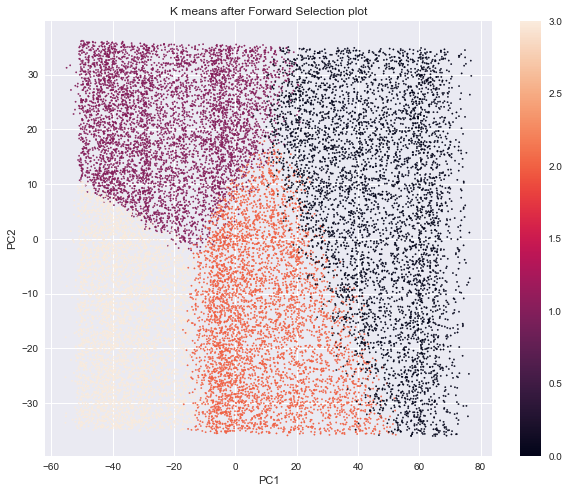

In [222]:
# kmeans plot - Kmeans followed by Forward Selection

sizes=dataset['f_selection_clus'].value_counts()
plot_set=pd.DataFrame()
plot_set['x']=principal_components[:,0]
plot_set['y']=principal_components[:,1]
plot_set['label']=dataset['f_selection_clus']
x = plot_set['x']
y = plot_set['y']
cluster = plot_set['label']  # Labels of cluster 0 to 3

sns.set(rc={'figure.figsize':(10,8)})

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(x,y,c=cluster,s=2)
ax.set_title('K means after Forward Selection plot')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.colorbar(scatter)

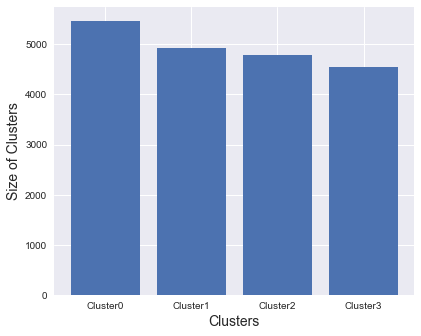

In [232]:
# K means cluster size analysis after Forward Selection:

sizes=dataset['f_selection_clus'].value_counts()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
clust = ['Cluster0', 'Cluster1', 'Cluster2', 'Cluster3']
sns.set(rc={'figure.figsize':(5,5)})

plt.xlabel('Clusters', fontsize=14)
plt.ylabel('Size of Clusters', fontsize=14)

ax.bar(clust,sizes)
plt.show()

#### B. Principal Component Analysis:

In [89]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
principal_components = pca.fit_transform(energy_data)

explained_var = pca.explained_variance_ratio_
print('Explained Variance Ratio', explained_var)

Explained Variance Ratio [0.53308056 0.1907079  0.06982409 0.06102661 0.04647148]


In [90]:
# Fitting the kmeans model for the principal components

kmeans.fit(principal_components)
pca_clus = kmeans.labels_

## Add the column of clusters i.e. 'pca_cluster' to the original Dataset:

dataset['pca_clusters'] = pca_clus

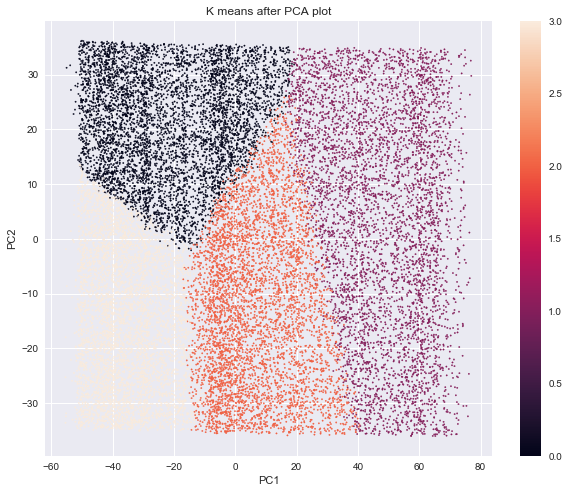

In [233]:
# kmeans plot - Kmeans followed by PCA
sizes=dataset['pca_clusters'].value_counts()
plot_set=pd.DataFrame()
plot_set['x']=principal_components[:,0]
plot_set['y']=principal_components[:,1]
plot_set['label']=dataset['pca_clusters']
x = plot_set['x']
y = plot_set['y']
cluster = plot_set['label']  # Labels of cluster

sns.set(rc={'figure.figsize':(10,8)})

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(x,y,c=cluster,s=2)
ax.set_title('K means after PCA plot')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.colorbar(scatter)

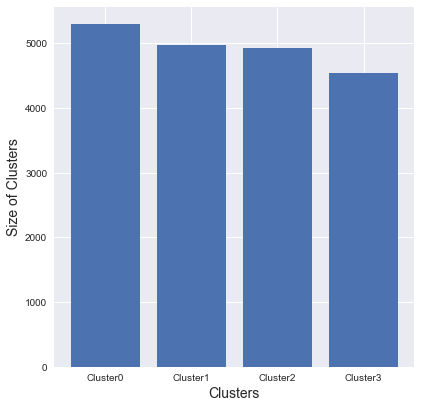

In [235]:
# K means cluster size analysis after PCA

sizes=dataset['pca_clusters'].value_counts()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
clust = ['Cluster0', 'Cluster1', 'Cluster2', 'Cluster3']

sns.set(rc={'figure.figsize':(5,5)})

plt.xlabel('Clusters', fontsize=14)
plt.ylabel('Size of Clusters', fontsize=14)

ax.bar(clust,sizes)
plt.show()

#### C. Independent Component Analysis:

In [93]:
from sklearn.decomposition import FastICA

fast_ICA = FastICA(n_components=8, random_state=0)
transformed_energy_data = fast_ICA.fit_transform(energy_data)
transformed_energy_data.shape

(19735, 8)

In [94]:
# Fitting the kmeans model for the principal components

kmeans.fit(transformed_energy_data)
ica_clus = kmeans.labels_

## Add the column of clusters i.e. 'ica_cluster' to the original Dataset:

dataset['ica_clusters'] = ica_clus

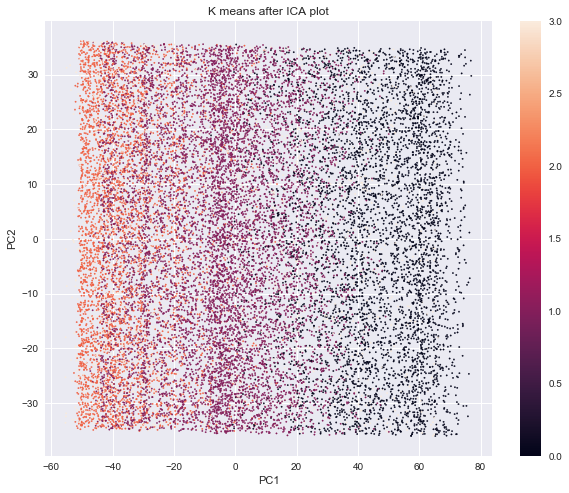

In [236]:
# kmeans plot - Kmeans followed by ICA

sizes=dataset['ica_clusters'].value_counts()
plot_set=pd.DataFrame()
plot_set['x']=principal_components[:,0]
plot_set['y']=principal_components[:,1]
plot_set['label']=dataset['ica_clusters']
x = plot_set['x']
y = plot_set['y']
cluster = plot_set['label']  # Labels of cluster 0 to 3

sns.set(rc={'figure.figsize':(10,8)})

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(x,y,c=cluster,s=2)
ax.set_title('K means after ICA plot')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.colorbar(scatter)

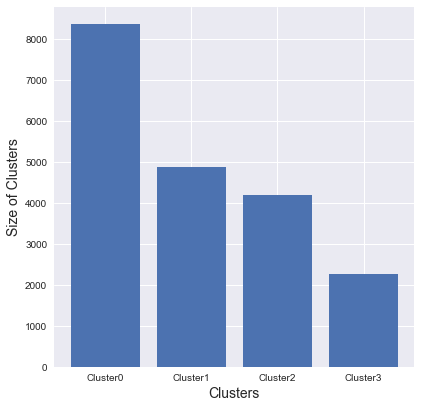

In [239]:
# K means cluster size analysis after ICA

sizes=dataset['ica_clusters'].value_counts()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
clust = ['Cluster0', 'Cluster1', 'Cluster2', 'Cluster3']

sns.set(rc={'figure.figsize':(5,5)})

plt.xlabel('Clusters', fontsize=14)
plt.ylabel('Size of Clusters', fontsize=14)

ax.bar(clust,sizes)
plt.show()

#### D. Randomized Projection:

In [97]:
from sklearn import random_projection

rand_projection = random_projection.SparseRandomProjection(n_components = 8)
transformed_ene_data = rand_projection.fit_transform(energy_data)
transformed_ene_data.shape

(19735, 8)

In [98]:
# Fitting the kmeans model for the principal components

kmeans.fit(transformed_ene_data)
rp_clusters=kmeans.labels_

## Add the column of clusters i.e. 'rand_proj_cluster' to the original Dataset:

dataset['rand_proj_cluster'] = rp_clusters

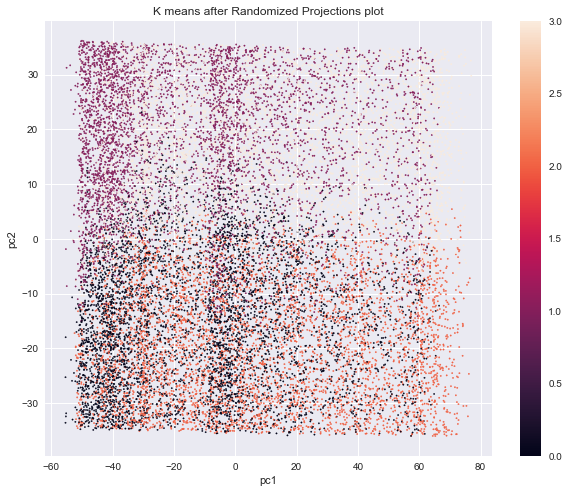

In [240]:
# kmeans plot - Kmeans followed by RCA (Randomized Projections)

sizes=dataset['rand_proj_cluster'].value_counts()
plot_set=pd.DataFrame()
plot_set['x']=principal_components[:,0]
plot_set['y']=principal_components[:,1]
plot_set['label']=dataset['rand_proj_cluster']
x = plot_set['x']
y = plot_set['y']
cluster = plot_set['label']  # Labels of cluster 0 to 3

sns.set(rc={'figure.figsize':(10,8)})

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(x,y,c=cluster,s=2)
ax.set_title('K means after Randomized Projections plot')
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
plt.colorbar(scatter)

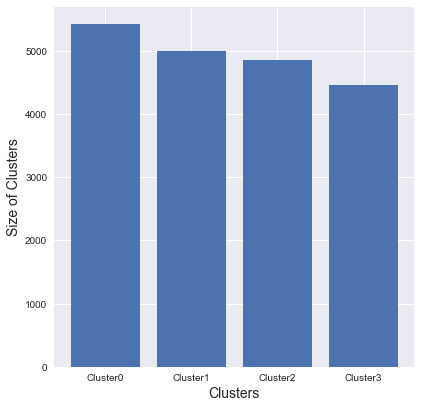

In [242]:
# K means cluster size analysis after RCA (Randomized Projections)

sizes=dataset['rand_proj_cluster'].value_counts()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
clust = ['Cluster0', 'Cluster1', 'Cluster2', 'Cluster3']

sns.set(rc={'figure.figsize':(5,5)})

plt.xlabel('Clusters', fontsize=14)
plt.ylabel('Size of Clusters', fontsize=14)

ax.bar(clust,sizes)
plt.show()

##### Final overview of Dataset:

In [101]:
dataset.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Visibility,Tdewpoint,rv1,rv2,kmean_clus,em_clus,f_selection_clus,pca_clusters,ica_clusters,rand_proj_cluster
0,1/11/2016 17:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,63.000000,5.3,13.275433,13.275433,3,3,1,0,3,3
1,1/11/2016 17:10,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,59.166667,5.2,18.606195,18.606195,3,3,1,0,3,1
2,1/11/2016 17:20,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,55.333333,5.1,28.642668,28.642668,0,3,3,3,3,3
3,1/11/2016 17:30,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,51.500000,5.0,45.410390,45.410390,0,3,3,3,3,2
4,1/11/2016 17:40,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,47.666667,4.9,10.084097,10.084097,3,3,1,0,3,1


#### Lets take some insights on how values of clusters are spread:

In [123]:
df = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2','PC3','PC4','PC5'])
finalDF = pd.concat([df, dataset[['Appliances_Class']]], axis = 1)

In [124]:
finalDF.head()

,PC1,PC2,PC3,PC4,PC5,Appliances_Class
0,-36.395101,17.267240,5.148061,-26.689224,9.031121,1
1,-36.174584,9.700099,6.438764,-23.138811,8.828877,1
2,-35.374588,-4.532174,7.679958,-19.643328,8.453163,0
3,-36.098464,-28.250374,8.980272,-16.130809,10.553137,0
4,-36.665260,21.691762,10.173959,-12.112460,10.068142,1


In [125]:
finalDF.shape

(19735, 6)

### Applying Neural Network on Principal Components and Different Cluster Outputs:

In [159]:
# Train Test Split:
x = finalDF.drop(columns=['Appliances_Class'],axis=1)
y = finalDF[['Appliances_Class']]
xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [160]:
import keras
import tensorflow as tf

from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import keras.metrics
from keras import optimizers

model = Sequential()
model.add(Dense(2, input_dim = 5, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

model.fit(xTrain,yTrain,epochs=100,verbose=1)

Epoch 1/100
13814/13814 [==============================] - 1s 52us/step - loss: 3.4745 - acc: 0.5471
Epoch 2/100
13814/13814 [==============================] - 0s 22us/step - loss: 1.6360 - acc: 0.5866
Epoch 3/100
13814/13814 [==============================] - 0s 22us/step - loss: 0.6664 - acc: 0.6095
Epoch 4/100
13814/13814 [==============================] - 0s 22us/step - loss: 0.6271 - acc: 0.6212
Epoch 5/100
13814/13814 [==============================] - 0s 22us/step - loss: 0.6270 - acc: 0.6202
Epoch 6/100
13814/13814 [==============================] - 0s 22us/step - loss: 0.6271 - acc: 0.6196
Epoch 7/100
13814/13814 [==============================] - 0s 22us/step - loss: 0.6268 - acc: 0.6204
Epoch 8/100
13814/13814 [==============================] - 0s 22us/step - loss: 0.6272 - acc: 0.6211
Epoch 9/100
13814/13814 [==============================] - 0s 22us/step - loss: 0.6264 - acc: 0.6205
Epoch 10/100
13814/13814 [==============================] - 0s 22us/step - loss: 0.6264 - a

In [161]:
from sklearn.metrics import classification_report
y_test_predict = model.predict(xTest)
y_predict = np.where(y_test_predict>= 0.5, 1, 0)

print('Classification Report:')
print(classification_report(yTest,y_predict))
print('Confusion Matrix:')
print(confusion_matrix(yTest,y_predict))

Classification Report:
             precision    recall  f1-score   support

          0       0.63      0.01      0.02      2192
          1       0.63      1.00      0.77      3729

avg / total       0.63      0.63      0.50      5921

Confusion Matrix:
[[  26 2166]
 [  15 3714]]


### Explained Variance Plot after PCA:

In [167]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.53308056, 0.1907079 , 0.06982409, 0.06102661, 0.04647148])

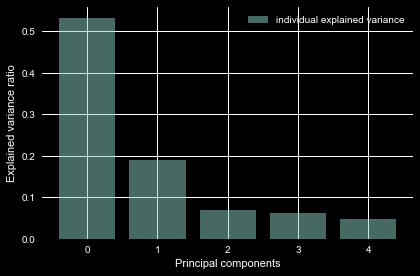

In [244]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(5), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

### Experimenting Neural Network with various cluster outputs and Class Label:

In [162]:
df2 = dataset[['kmean_clus', 'em_clus', 'f_selection_clus','pca_clusters','ica_clusters', 'rand_proj_cluster', 'Appliances_Class']]

In [163]:
df2.head()

,kmean_clus,em_clus,f_selection_clus,pca_clusters,ica_clusters,rand_proj_cluster,Appliances_Class
0,3,3,1,0,3,3,1
1,3,3,1,0,3,1,1
2,0,3,3,3,3,3,0
3,0,3,3,3,3,2,0
4,3,3,1,0,3,1,1


#### Using Group by to get better insights on clusters

In [175]:
#df2.groupby(['kmean_clus','Appliances_Class'])['Appliances_Class'].count()

kmean_clus  Appliances_Class
0           0                   2177
            1                   2333
1           0                    974
            1                   3915
2           0                   1851
            1                   3208
3           0                   2460
            1                   2817
Name: Appliances_Class, dtype: int64

### Plotting comparative plots of various clusters, based on o/p labels:

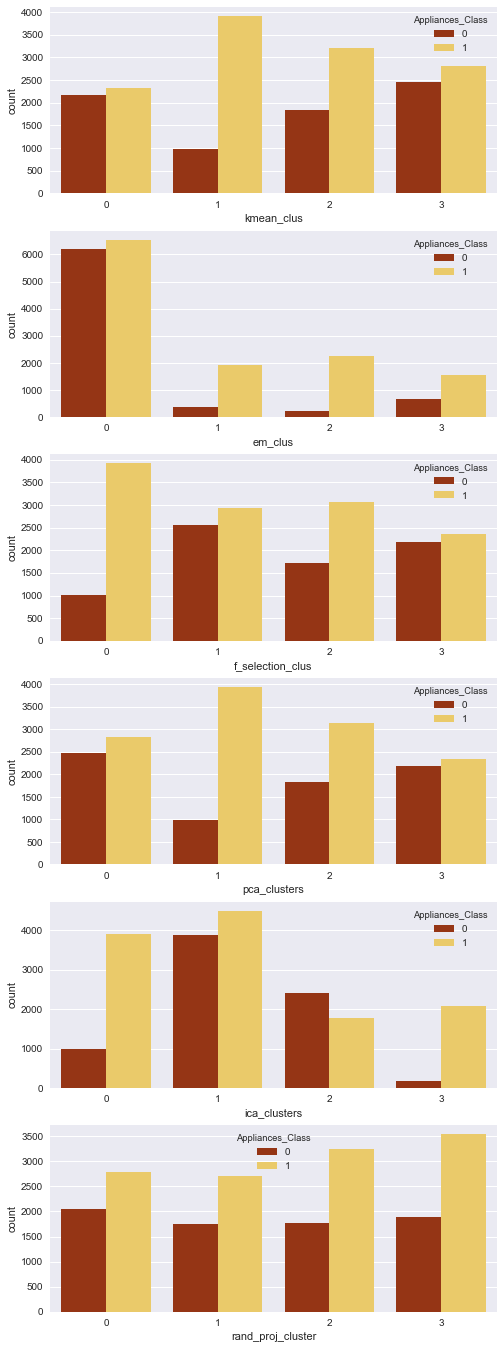

In [263]:
sns.set(rc={'figure.figsize':(8,24)})
fig, (ax1,ax2,ax3,ax4,ax5,ax6)=plt.subplots(6)
sns.countplot(data = df2, x = 'kmean_clus', hue = 'Appliances_Class', palette = 'afmhot',ax=ax1)
sns.countplot(data = df2, x = 'em_clus', hue = 'Appliances_Class', palette = 'afmhot',ax=ax2)
sns.countplot(data = df2, x = 'f_selection_clus', hue = 'Appliances_Class', palette = 'afmhot',ax=ax3)
sns.countplot(data = df2, x = 'pca_clusters', hue = 'Appliances_Class', palette = 'afmhot',ax=ax4)
sns.countplot(data = df2, x = 'ica_clusters', hue = 'Appliances_Class', palette = 'afmhot',ax=ax5)
sns.countplot(data = df2, x = 'rand_proj_cluster', hue = 'Appliances_Class', palette = 'afmhot',ax=ax6)

### Applying Neural net on Cluster outputs and Class Labels:

In [164]:
# Train Test Split:
x = df2.drop(columns=['Appliances_Class'],axis=1)
y = df2[['Appliances_Class']]
xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [165]:
model = Sequential()
model.add(Dense(4, input_dim = 6, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

model.fit(xTrain,yTrain,epochs=100,batch_size=50,verbose=1)

Epoch 1/100
13814/13814 [==============================] - 1s 46us/step - loss: 0.6568 - acc: 0.6203
Epoch 2/100
13814/13814 [==============================] - 0s 14us/step - loss: 0.6239 - acc: 0.6379
Epoch 3/100
13814/13814 [==============================] - 0s 14us/step - loss: 0.6164 - acc: 0.6436
Epoch 4/100
13814/13814 [==============================] - 0s 14us/step - loss: 0.6134 - acc: 0.6447
Epoch 5/100
13814/13814 [==============================] - 0s 14us/step - loss: 0.6114 - acc: 0.6479
Epoch 6/100
13814/13814 [==============================] - 0s 14us/step - loss: 0.6098 - acc: 0.6483
Epoch 7/100
13814/13814 [==============================] - 0s 14us/step - loss: 0.6088 - acc: 0.6483
Epoch 8/100
13814/13814 [==============================] - 0s 15us/step - loss: 0.6073 - acc: 0.6693
Epoch 9/100
13814/13814 [==============================] - 0s 17us/step - loss: 0.6065 - acc: 0.6729
Epoch 10/100
13814/13814 [==============================] - 0s 15us/step - loss: 0.6050 - a

In [166]:
from sklearn.metrics import classification_report
y_test_pred = model.predict(xTest)
y_pred = np.where(y_test_pred>= 0.5, 1, 0)

print('Classification Report:')
print(classification_report(yTest,y_pred))
print('Confusion Matrix:')
print(confusion_matrix(yTest,y_pred))

Classification Report:
             precision    recall  f1-score   support

          0       0.56      0.50      0.53      2192
          1       0.72      0.77      0.75      3729

avg / total       0.66      0.67      0.67      5921

Confusion Matrix:
[[1097 1095]
 [ 855 2874]]
